In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [12]:
# MNIST dataset Loading
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalization
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Reshaping the input data
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

# Converting the labels to one-hot encoded vectors
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

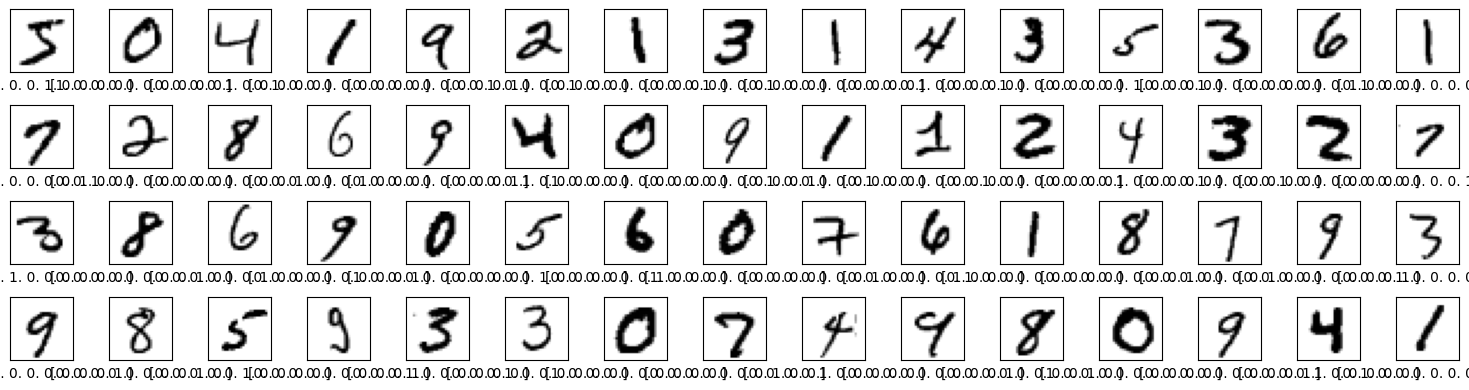

In [13]:
ROWS = 4
COLS = 15
i = 0

plt.figure(figsize=(15,4))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)

        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show()

In [14]:
def build_model():
    model = keras.Sequential(
        [
            layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Flatten(),
            layers.Dense(128, activation="relu"),
            layers.Dense(10, activation="softmax"),
        ]
    )
    return model

model = build_model()

In [15]:
# Applying SGD optimizer
model_sgd = build_model()
model_sgd.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    metrics=["accuracy"],
)

In [18]:
# Applying Adam optimizer
model_adam = build_model()
model_adam.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
)

In [19]:
# Applying RMSprop optimizer
model_rmsprop = build_model()
model_rmsprop.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=["accuracy"],
)

In [20]:
# Train the models and record their accuracy and loss
history_sgd = model_sgd.fit(x_train, y_train, epochs=3, batch_size=64, validation_split=0.2)
history_adam = model_adam.fit(x_train, y_train, epochs=3, batch_size=64, validation_split=0.2)
history_rmsprop = model_rmsprop.fit(x_train, y_train, epochs=3, batch_size=64, validation_split=0.2)

# Evaluate the models on the test set
test_loss_sgd, test_acc_sgd = model_sgd.evaluate(x_test, y_test)
test_loss_adam, test_acc_adam = model_adam.evaluate(x_test, y_test)
test_loss_rmsprop, test_acc_rmsprop = model_rmsprop.evaluate(x_test, y_test)

# Print the test set accuracy for each optimizer
print('Test set accuracy for SGD optimizer:', test_acc_sgd)
print('Test set accuracy for Adam optimizer:', test_acc_adam)
print('Test set accuracy for RMSprop optimizer:', test_acc_rmsprop)

Epoch 1/3
750/750 [==============================] - 48s 63ms/step - loss: 0.8528 - accuracy: 0.7714 - val_loss: 0.2808 - val_accuracy: 0.9163
Epoch 2/3
750/750 [==============================] - 43s 57ms/step - loss: 0.2529 - accuracy: 0.9251 - val_loss: 0.2098 - val_accuracy: 0.9388
Epoch 3/3
750/750 [==============================] - 42s 56ms/step - loss: 0.1775 - accuracy: 0.9463 - val_loss: 0.1431 - val_accuracy: 0.9596
Epoch 1/3
750/750 [==============================] - 44s 58ms/step - loss: 0.1788 - accuracy: 0.9468 - val_loss: 0.0697 - val_accuracy: 0.9787
Epoch 2/3
750/750 [==============================] - 44s 59ms/step - loss: 0.0538 - accuracy: 0.9827 - val_loss: 0.0483 - val_accuracy: 0.9855
Epoch 3/3
750/750 [==============================] - 43s 58ms/step - loss: 0.0366 - accuracy: 0.9885 - val_loss: 0.0487 - val_accuracy: 0.9846
Epoch 1/3
750/750 [==============================] - 43s 57ms/step - loss: 0.1770 - accuracy: 0.9452 - val_loss: 0.0640 - val_accuracy: 0.9814

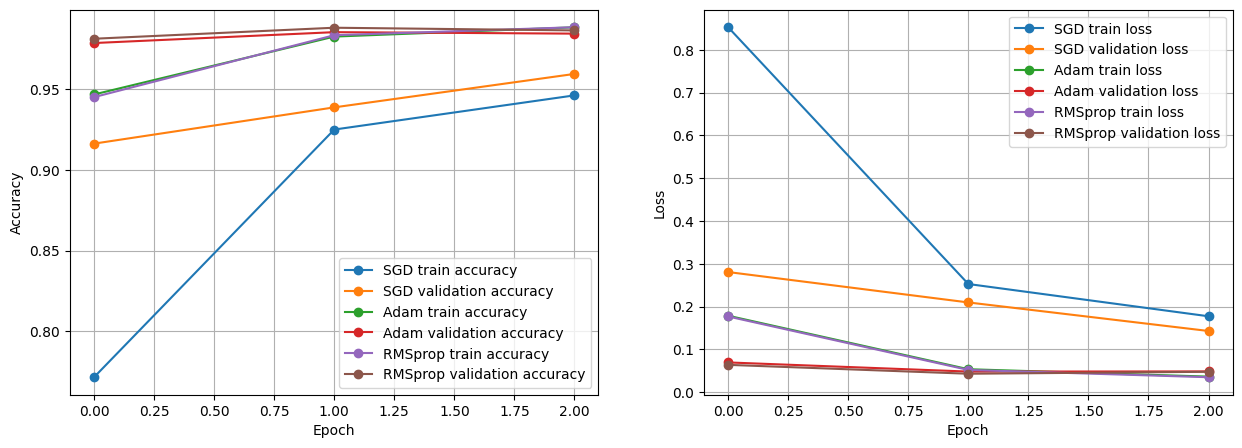

In [22]:
# Plot the comparison of the three optimizers' performance
plt.figure(figsize=(15,5))

# Plot the accuracy
plt.subplot(1,2,1)
plt.plot(history_sgd.history['accuracy'], 'o-', label='SGD train accuracy')
plt.plot(history_sgd.history['val_accuracy'], 'o-', label = 'SGD validation accuracy')
plt.plot(history_adam.history['accuracy'], 'o-', label='Adam train accuracy')
plt.plot(history_adam.history['val_accuracy'], 'o-', label = 'Adam validation accuracy')
plt.plot(history_rmsprop.history['accuracy'], 'o-', label='RMSprop train accuracy')
plt.plot(history_rmsprop.history['val_accuracy'], 'o-', label = 'RMSprop validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

# Plot the loss
plt.subplot(1,2,2)
plt.plot(history_sgd.history['loss'], 'o-', label='SGD train loss')
plt.plot(history_sgd.history['val_loss'], 'o-', label='SGD validation loss')
plt.plot(history_adam.history['loss'], 'o-', label='Adam train loss')
plt.plot(history_adam.history['val_loss'], 'o-', label='Adam validation loss')
plt.plot(history_rmsprop.history['loss'], 'o-', label='RMSprop train loss')
plt.plot(history_rmsprop.history['val_loss'], 'o-', label='RMSprop validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()